Masukkan panjang simulasi: 12
Masukkan selang waktu: 1
Masukkan nilai t: 8


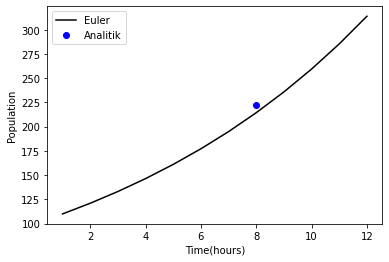

In [ ]:
"""
                      METODE EULER
Diketahui :
growth_rate = 0.10
population(0) = 100
growth(t) = growth_rate * population(t - Δt)
population(t) = population(t - Δt) + growth(t) * Δt
P(t+Δt) = P(t)+P`(t)*Δt
"""
# INPUT
growth_rate = 0.1
population = 100
time = []
populations = []

t=0
e = 2.71828
simulationLength = float(input("Masukkan panjang simulasi: "))
delta_t = float(input("Masukkan selang waktu: "))
times =int(input("Masukkan nilai t: "))
numIterations = int(simulationLength/delta_t)
for i in range(0,numIterations):
  t = t + delta_t
  growth = growth_rate*population
  population = population + growth
  time.append(t)
  populations.append(population)

# SOLUSI ANALITIK
def p(times) :
  y = 100*e**(0.1*times)
  return y
analitik = p(times)
import matplotlib.pyplot as plt
plt.plot(time,populations, label="Euler",color="black")
plt.plot(times,analitik,"o",label="Analitik",color = "blue")
plt.xlabel("Time(hours)")
plt.ylabel("Population")
plt.legend()
plt.show()




Masukkan panjang simulasi: 12
Masukkan selang waktu: 1
Masukkan nilai t: 8


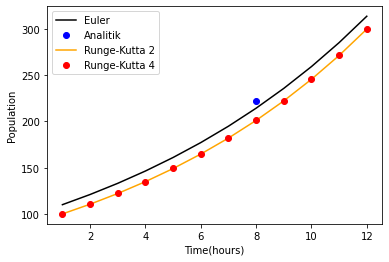

In [ ]:
"""
                                           METODE RUNGE - KUTTA 
"""
# INPUT
growth_rate = 0.1
population = 100
time = []
populations = []
t = 0
e = 2.71828
simulationLength = float(input("Masukkan panjang simulasi: "))
delta_t = float(input("Masukkan selang waktu: "))
times =int(input("Masukkan nilai t: "))
numIterations = int(simulationLength/delta_t)

# Metode Euler
for i in range(0,numIterations):
  t = t + delta_t
  growth = growth_rate*population
  population = population + growth
  time.append(t)
  populations.append(population)

# SOLUSI ANALITIK
def p(times) :
  y = 100*e**(0.1*times)
  return y
analitik = p(times)


x = np.linspace(0,simulationLength,num=numIterations)
import numpy as np

#                                     Metode Runge-Kutta 2
def fungsi(x,y):
    output = 0.1*y
    return output
yrk2 = np.zeros(numIterations)
yrk2[0] = 100
for i in range (numIterations-1):
  Yn = yrk2[i] + fungsi(x[i], yrk2[i])
  yrk2[i+1] = yrk2[i] + 0.5*(fungsi(x[i], yrk2[i])+fungsi(x[i+1],Yn))

#                                     Metode Runge-Kutta 4
def f(x,y):
    output = 100*e**(0.1*x)
    return output
dx = 0
y = []
for i in range(0,numIterations):
  y.append(f(dx,y))
  dx = dx + delta_t
yrk = np.zeros(numIterations)
yrk[0] = 100
for i in range (numIterations-1):
    k1 = fungsi(x[i], yrk[i])
    k2 = fungsi(x[i] + 0.5 * delta_t, y[i] + 0.5 * delta_t * k1)
    k3 = fungsi(x[i] + 0.5 * delta_t, y[i] + 0.5 * delta_t * k2)
    k4 = fungsi(x[i] + delta_t, y[i] + delta_t * k3)
    yrk[i+1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * delta_t)/6


import matplotlib.pyplot as plt
plt.plot(time,populations, label="Euler",color="black")
plt.plot(times,analitik,"o",label="Analitik",color = "blue")
plt.plot(time,yrk2,label="Runge-Kutta 2",color = "orange")
plt.plot(time,yrk,"o",label="Runge-Kutta 4",color = "red")
plt.xlabel("Time(hours)")
plt.ylabel("Population")
plt.legend()
plt.show()



[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
[1.    5.25  5.875 5.125 4.5   4.75  5.875 7.125 7.   ]
[1.     3.4375 3.375  2.6875 2.5    3.1875 4.375  4.9375 3.    ]
[1.    5.875 5.75  4.375 4.    5.375 7.75  8.875 5.   ]
[1.      3.21875 3.      2.21875 2.      2.71875 4.      4.71875 3.     ]


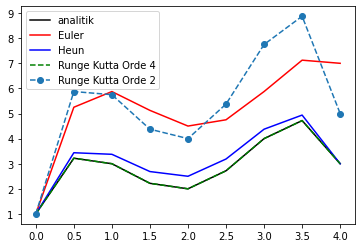

In [ ]:
"""
                                CONTOH SOAL 1
f(x,y) = dy/dt = -2x^3+12x^2 + 20x + 8.5
Gunakan initial condition y(0) = 1 dan dx = 0.5
dengan x antara 0 s.d. 4
Beri analisis!

"""
import numpy as np
import matplotlib.pyplot as plt

def fungsi(x,y):
    output = -2 * np.power(x,3) + 12 * np.power(x,2) - 20 * x + 8.5
    return output

dx = 0.5            # selang waktu
bawah = 0           # batas bawah
atas = 4            # batas atas
n = (int)((atas-bawah) / dx) + 1        #jumlah simulasi

x = np.linspace(0,4,num=n)
y = np.array([1.0, 3.21875, 3.0, 2.21875, 2.0, 2.71875, 4.0, 4.71875, 3.0])

print(x)

#-------------------------------------------
#Euler
ye = np.zeros(n)
ye[0] = 1
for i in range (n-1):
    ye[i+1] = ye[i] + dx * fungsi(x[i], ye[i])

print(ye)
#-------------------------------------------

#-------------------------------------------
#Heun
yh = np.zeros(n)
yh[0] = 1
for i in range(n-1):
    k1 = fungsi(x[i], yh[i])
    k2 = fungsi(x[i]+dx, yh[i]+dx * k1)
    yh[i+1] = yh[i] + dx * (k1 + k2) / 2;

print(yh)
#-------------------------------------------
#-------------------------------------------
#Runge Kutta Orde 2
#-------------------------------------------
yrk2 = np.zeros(n)
yrk2[0] = 1
for i in range (n-1):
    Yn = yrk2[i] + fungsi(x[i], yrk2[i])
    yrk2[i+1] = yrk2[i] + 0.5*(fungsi(x[i], yrk2[i])+fungsi(x[i+1],Yn))

print(yrk2)

#-------------------------------------------
#-------------------------------------------
#Runge Kutta Orde 4
#-------------------------------------------
yrk = np.zeros(n)
yrk[0] = 1
for i in range (n-1):
    k1 = fungsi(x[i], yrk[i])
    k2 = fungsi(x[i] + 0.5 * dx, y[i] + 0.5 * dx * k1)
    k3 = fungsi(x[i] + 0.5 * dx, y[i] + 0.5 * dx * k2)
    k4 = fungsi(x[i] + dx, y[i] + dx * k3)
    yrk[i+1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * dx)/6

print(yrk)
#-------------------------------------------

fig, ax = plt.subplots()
ax.plot(x,y,"k", label = "analitik")
ax.plot(x,ye,"r", label = "Euler")
ax.plot(x,yh,"b", label = "Heun")
ax.plot(x,yrk,"g--", label = "Runge Kutta Orde 4")
ax.plot(x,yrk2,"o--", label = "Runge Kutta Orde 2")
legend = ax.legend()
plt.show()

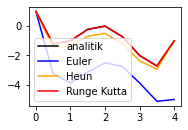

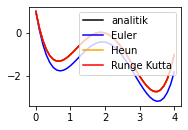

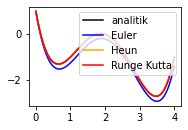

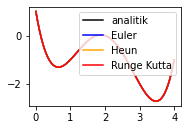

In [51]:
"""
                                CONTOH SOAL 2
f(x,y) = dy/dt = 2x^3-12x^2 + 20x - 8.5
Gunakan initial condition y(0) = 1 dan dx =  [0.5,0.1,0.05,0.01] 
dengan x antara 0 s.d. 4
Beri analisis!

"""



#Algoritma

import numpy as np #Mengimport data numpy sebagai np
import matplotlib.pyplot as plt #Mengimport matplotlib.pyplot sebagai plt
#Definisikan dy/dt
def fungsi(x,y):
  output = 2 * np.power(x,3) - 12 * np.power(x,2) + 20 * x - 8.5
  return output

# Definisikan fungsi analitik integral dy/dt
def fungsianalitik(x):
  ya= 0.5*np.power (x,4) - 4*np.power(x,3) + 10*np.power(x,2) - 8.5*x+1
  return ya
dx = [0.5,0.1,0.05,0.001] # Lebar grid
x0 = 0 # Batas bawah
xn = 4 # Batas atas
#list kosong untuk memudahkan plot
N=[]
X=[]
Y=[]
yEuleur=[]
yHeun=[]
yRungeKutta=[]

for i in range (len(dx)):
  n= (int)((xn-x0) / dx[i]) + 1
  N.append(n) # memasukan hasil n ke list array

for j in range (len(N)): # menghitung x
  x = np.linspace(0,4,num=N[j])
  X.append(x) # memasukan hasil x ke list array

#                                                 Analitik
for k in range (len(N)): # menghitung y analitik
  y= fungsianalitik(X[k])
  Y.append(y) # memasukan y ke list array
for k in range (len(N)):
  ye = np.zeros(N[k])
  ye[0] = 1
  Xarray= X[k]
  Yarray= Y[k]

  for i in range (N[k]-1):
    ye[i+1] = ye[i] + dx[k] * fungsi(Xarray[i], ye[i])
  yEuleur.append(ye)
  yh = np.zeros(N[k])
  yh[0] = 1

  #                                                    Heun
  for i in range(N[k] - 1):
    k1 = fungsi(Xarray[i], yh[i])
    k2 = fungsi(Xarray[i] + dx[k], yh[i] + dx[k] * k1)
    yh[i + 1] = yh[i] + dx[k] * (k1 + k2) / 2
  yHeun.append(yh)
  #                                                 Runge kutta 4
  yrk = np.zeros(N[k])
  yrk[0] = 1
  for i in range(N[k] - 1): # menghitung dengan metode runge kutta
    k1 = fungsi(Xarray[i], yrk[i])
    k2 = fungsi(Xarray[i] + 0.5 * dx[k], Yarray[i] + 0.5 * dx[k] *k1)
    k3 = fungsi(Xarray[i] + 0.5 * dx[k], Yarray[i] + 0.5 * dx[k] *k2)
    k4 = fungsi(Xarray[i] + dx[k], Yarray[i] + dx[k] * k3)
    yrk[i + 1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * dx[k]) / 6
  yRungeKutta.append(yrk)
# Plot
  plt.subplot(2, 2, k+1) # sub plot 4x4
  plt.plot(X[k], Y[k], "k", label="analitik",color = "black") # plot untuk metode Analitik
  plt.plot(X[k], yEuleur[k], "r", label="Euler",color = "blue")# plot untuk metode Euler
  plt.plot(X[k], yHeun[k], "b", label="Heun",color = "orange") # plot untuk metode Heun
  plt.plot(X[k], yRungeKutta[k], "g", label="Runge Kutta",color = "red")# plot untuk metode Runge Kutta
  plt.legend()
  plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


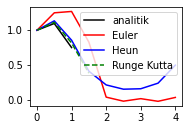

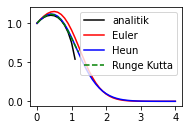

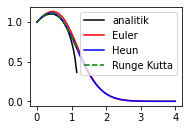

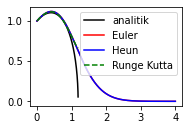

In [52]:
"""
𝑓(𝑥, 𝑦) = dy/dt = y^2 -3t /2y
Gunakan initial condition y(0) = 1 dan dx = [
0.5,0.1,0.05,0.01] dan x antara 0 s.d 4 
Dimana analitiknya adalah
(𝑦 + 3𝑡 − 2𝑒^𝑡)^0.5
Beri analisis!
"""

#Algoritma
import numpy as np #Mengimport data numpy sebagai np
import matplotlib.pyplot as plt #Mengimport matplotlib.pyplot sebagai plt
#Definisikan dy/dt
def fungsi(t,y):#defnisikan soal
  ysoal = ((y**2-3*t)/2*y)
  return ysoal
# Definisikan fungsi analitik integral dy/dt
def fungsianalitik(t):
  ya= np.sqrt(3+3*t-2*np.exp(t))
  return ya
dx = [0.5,0.1,0.05,0.001] # Lebar grid
x0 = 0 # Batas bawah
xn = 4 # Batas atas
#list kosong untuk memudahkan plot
N=[]
X=[]
Y=[]
yEuleur=[]
yHeun=[]
yRungeKutta=[]
for i in range (len(dx)): #menghitung n
  n= (int)((xn-x0) / dx[i]) + 1
  N.append(n) # memasukan hasil n ke list array
for j in range (len(N)): # menghitung x
  x = np.linspace(0,4,num=N[j])
  X.append(x) # memasukan hasil x ke list array
                                                      # Analitik
for k in range (len(N)): # menghitung y analitik
  y= fungsianalitik(X[k])
  Y.append(y) # memasukan y ke list array
for k in range (len(N)):
  ye = np.zeros(N[k])
  ye[0] = 1
  Xarray= X[k]
  Yarray= Y[k]
# Euler
  for i in range (N[k]-1):
    ye[i+1] = ye[i] + dx[k] * fungsi(Xarray[i], ye[i])
  yEuleur.append(ye)
  yh = np.zeros(N[k])
  yh[0] = 1
# Heun
  for i in range(N[k] - 1):
    k1 = fungsi(Xarray[i], yh[i])
    k2 = fungsi(Xarray[i] + dx[k], yh[i] + dx[k] * k1)
    yh[i + 1] = yh[i] + dx[k] * (k1 + k2) / 2
  yHeun.append(yh)
# Runge kutta
  yrk = np.zeros(N[k])
  yrk[0] = 1
  for i in range(N[k] - 1): # menghitung dengan metode runge kutta
    k1 = fungsi(Xarray[i], yrk[i])
    k2 = fungsi(Xarray[i] + 0.5 * dx[k], Yarray[i] + 0.5 * dx[k] *k1)
    k3 = fungsi(Xarray[i] + 0.5 * dx[k], Yarray[i] + 0.5 * dx[k] *k2)
    k4 = fungsi(Xarray[i] + dx[k], Yarray[i] + dx[k] * k3)
    yrk[i + 1] = yrk[i] + ((k1 + 2 * k2 + 2 * k3 + k4) * dx[k]) / 6
  yRungeKutta.append(yrk)
# Plot
  plt.subplot(2, 2, k+1) # sub plot 4x4
  plt.plot(X[k], Y[k], "k", label="analitik") # plot untuk metode Analitik
  plt.plot(X[k], yEuleur[k], "r", label="Euler")# plot untuk metode Euler
  plt.plot(X[k], yHeun[k], "b", label="Heun") # plot untuk metode Heun
  plt.plot(X[k], yRungeKutta[k], "g--", label="Runge Kutta") # plot untuk metode Runge Kutta
  legend = plt.legend()
  plt.show()